In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def duple(n):   # on va renvoyer des couples (i,j) pour tenter de fit un arma (i,j)
    res =[]
    for i in range(0,n):
        for j in  range(0,n):
            res.append((i,j))
    return res




S = pd.read_csv('C:\\Users\\steve\\Downloads\\loadForecastingDataset-eiST4\\dataset_centrale\\data\\train\\AUVERGNE RHONE ALPES.csv')
conso = np.array(S['Consommation'])
models=duple(5)
M = {}
for p,q in models:
    try:
    #fit an arma (for now without trend)
        ft =  ARMA(conso,order=(p,q)).fit()
        M[p,q] = ft
    except ValueError:
        print()
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 
AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))
k = np.argmin(AIC['dAIC'])
p,q = AIC.model[k]
print('le meilleure modèle est un arma' )
print(p,q)
r = M[p,q].resid
print('la p-value est')
print(acorr_ljungbox(r,lags=[p+q+1])[1])

In [10]:
M[4,4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                30672
Model:                     ARMA(4, 4)   Log Likelihood             -191854.135
Method:                       css-mle   S.D. of innovations            125.955
Date:                Tue, 08 Jun 2021   AIC                         383728.270
Time:                        17:50:14   BIC                         383811.581
Sample:                             0   HQIC                        383754.974
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7602.8250    129.645     58.643      0.000    7348.725    7856.925
ar.L1.y        2.5777   8.32e-05    3.1e+04      0.000       2.578       2.578
ar.L2.y       -1.9068   9.55e-05     -2e+04      0.000      -1.907      -1.907
ar.L3.y       -0.0126      0.000    -75.006      0.000      -0.013      -0.012
ar.L4.y        0.3408      0.000   2705.560      0.000       0.341       0.341
ma.L1.y       -1.0194      0.008   -133.317      0.000      -1.034      -1.004
ma.L2.y       -0.3464      0.008    -43.343      0.000      -0.362      -0.331
ma.L3.y        0.1299      0.008     16.004      0.000       0.114       0.146
ma.L4.y        0.3945      0.005     72.097      0.000       0.384       0.405
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9661           -0.2589j            1.0002           -0.0417
AR.2            0.9661           +0.2589j            1.0002            0.0417
AR.3            1.0097           -0.0000j            1.0097           -0.0000
AR.4           -2.9049           -0.0000j            2.9049           -0.5000
MA.1            0.9697           -0.2620j            1.0044           -0.0420
MA.2            0.9697           +0.2620j            1.0044            0.0420
MA.3           -1.1343           -1.1072j            1.5851           -0.3769
MA.4           -1.1343           +1.1072j            1.5851            0.3769
-----------------------------------------------------------------------------
"""

In [3]:
S = pd.read_csv('C:\\Users\\steve\\Downloads\\loadForecastingDataset-eiST4\\dataset_centrale\\data\\test\\AUVERGNE RHONE ALPES.csv')
conso = np.array(S['Consommation'])
arma=np.zeros(len(conso))
arma[:4]=conso[:4]
esp=np.random.normal(size=len(conso))

In [4]:
for i in range(4,len(conso)):
    arma[i]=(2.5777*arma[i-1]-1.9068*arma[i-2]-0.0126*arma[i-3]+0.3408*arma[i-4]-1.0194*esp[i-1]-0.3464*esp[i-2]+0.1299*esp[i-3]+0.3945*esp[i-4])

arma[3:]+=7602.825

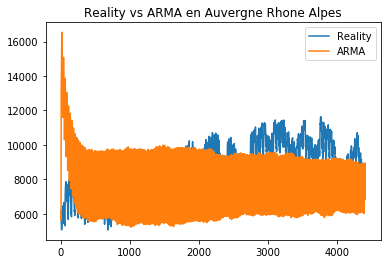

In [5]:
plt.plot(conso,label='Reality')
plt.plot(arma,label='ARMA')
plt.title('Reality vs ARMA en Auvergne Rhone Alpes')
plt.legend(loc='best')
plt.show()

In [6]:
mean_absolute_percentage_error(conso,arma)

22.955564111862834

The model clearly isn't consistent

In [60]:
S = pd.read_csv('C:\\Users\\steve\\Downloads\\loadForecastingDataset-eiST4\\dataset_centrale\\data\\train\\ILE DE FRANCE.csv')
conso = np.array(S['Consommation'])
models=duple(5)
M = {}
for p,q in models:
    try:
    #fit an arma (for now without trend)
        ft =  ARMA(conso,order=(p,q)).fit()
        M[p,q] = ft
    except ValueError:
        print()
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 
AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))
k = np.argmin(AIC['dAIC'])
p,q = AIC.model[k]
print('le meilleure modèle est un arma' )
print(p,q)
r = M[p,q].resid
print('la p-value est')
print(acorr_ljungbox(r,lags=[p+q+1])[1])

C:\Users\steve\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


le meilleure modèle est un arma
3 2
la p-value est
[3.27457424e-96]


In [61]:
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                30672
Model:                     ARMA(3, 2)   Log Likelihood             -204425.846
Method:                       css-mle   S.D. of innovations            189.780
Date:                Wed, 09 Jun 2021   AIC                         408865.692
Time:                        09:25:06   BIC                         408924.010
Sample:                             0   HQIC                        408884.385
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8116.9834    458.236     17.714      0.000    7218.857    9015.110
ar.L1.y        2.7356      0.000   2.16e+04      0.000       2.735       2.736
ar.L2.y       -2.5092      0.000  -1.89e+04      0.000      -2.510      -2.509
ar.L3.y        0.7736   5.85e-05   1.32e+04      0.000       0.774       0.774
ma.L1.y       -1.2067      0.006   -210.935      0.000      -1.218      -1.195
ma.L2.y        0.2177      0.006     37.886      0.000       0.206       0.229
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.1214           -0.1849j            1.1366           -0.0260
AR.3            1.1214           +0.1849j            1.1366            0.0260
MA.1            1.0143           +0.0000j            1.0143            0.0000
MA.2            4.5288           +0.0000j            4.5288            0.0000
-----------------------------------------------------------------------------
"""

In [7]:
S = pd.read_csv('C:\\Users\\steve\\Downloads\\loadForecastingDataset-eiST4\\dataset_centrale\\data\\test\\ILE DE FRANCE.csv')
conso = np.array(S['Consommation'])
arma=np.zeros(len(conso))
eps=np.random.normal(size=len(conso))
arma[:2]=conso[:2]
arma[2]=-1.2067*eps[1]+0.2177*eps[0]
for i in range(3,len(conso)):
    arma[i]=2.7356*arma[i-1]-2.5092*arma[i-2]+0.7736*arma[i-3]-1.2067*eps[i-1]+0.2177*eps[i-2]
    
arma[2:]+=8116.9834

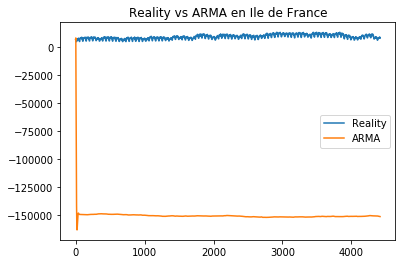

In [8]:
plt.plot(conso,label='Reality')
plt.plot(arma,label='ARMA')
plt.title('Reality vs ARMA en Ile de France')
plt.legend(loc='best')
plt.show()

In [9]:
mean_absolute_percentage_error(conso,arma)

1857.3168946319377

The model isn't consistent

In [63]:
S = pd.read_csv('C:\\Users\\steve\\Downloads\\loadForecastingDataset-eiST4\\dataset_centrale\\data\\train\\BRETAGNE.csv')
conso = np.array(S['Consommation'])
models=duple(5)
M = {}
for p,q in models:
    try:
    #fit an arma (for now without trend)
        ft =  ARMA(conso,order=(p,q)).fit()
        M[p,q] = ft
    except ValueError:
        print()
AIC = pd.DataFrame( [(m,ft.aic) for m,ft in M.items()],columns=['model','AIC'] ) 
AIC = AIC.assign(dAIC=(AIC.AIC-AIC.AIC.min()))
k = np.argmin(AIC['dAIC'])
p,q = AIC.model[k]
print('le meilleure modèle est un arma' )
print(p,q)
r = M[p,q].resid
print('la p-value est')
print(acorr_ljungbox(r,lags=[p+q+1])[1])


le meilleure modèle est un arma
4 4
la p-value est
[3.5499822e-128]


In [64]:
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                30672
Model:                     ARMA(4, 4)   Log Likelihood             -184496.000
Method:                       css-mle   S.D. of innovations             99.096
Date:                Wed, 09 Jun 2021   AIC                         369012.001
Time:                        09:39:00   BIC                         369095.312
Sample:                             0   HQIC                        369038.704
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2512.7502     33.795     74.353      0.000    2446.514    2578.987
ar.L1.y        1.0023      0.009    110.405      0.000       0.985       1.020
ar.L2.y       -0.1721      0.015    -11.311      0.000      -0.202      -0.142
ar.L3.y       -0.4230      0.014    -29.509      0.000      -0.451      -0.395
ar.L4.y        0.5492      0.008     71.455      0.000       0.534       0.564
ma.L1.y        0.1321      0.009     14.057      0.000       0.114       0.151
ma.L2.y        0.4426      0.008     57.298      0.000       0.427       0.458
ma.L3.y        0.6436      0.008     83.170      0.000       0.628       0.659
ma.L4.y        0.3894      0.006     62.431      0.000       0.377       0.402
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3170           -0.0000j            1.3170           -0.5000
AR.2            1.0266           -0.0000j            1.0266           -0.0000
AR.3            0.5303           -1.0322j            1.1605           -0.1745
AR.4            0.5303           +1.0322j            1.1605            0.1745
MA.1            0.4631           -0.9022j            1.0141           -0.1745
MA.2            0.4631           +0.9022j            1.0141            0.1745
MA.3           -1.2895           -0.9134j            1.5802           -0.4019
MA.4           -1.2895           +0.9134j            1.5802            0.4019
-----------------------------------------------------------------------------
"""

In [10]:
S = pd.read_csv('C:\\Users\\steve\\Downloads\\loadForecastingDataset-eiST4\\dataset_centrale\\data\\test\\BRETAGNE.csv')
conso = np.array(S['Consommation'])
arma=np.zeros(len(conso))
arma[:4]=conso[:4]
esp=np.random.normal(size=len(conso))
for i in range(4,len(conso)):
    arma[i]=(1.0023*arma[i-1]-0.1721*arma[i-2]-0.4230*arma[i-3]+0.5492*arma[i-4]+0.1321*esp[i-1]+0.4426*esp[i-2]+0.6436*esp[i-3]+0.3894*esp[i-4])

arma[4:]+=2512.7502

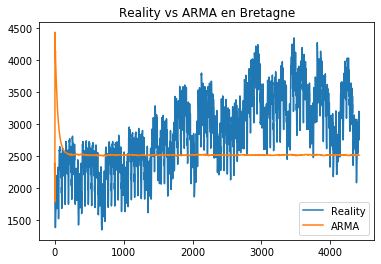

In [11]:
plt.plot(conso,label='Reality')
plt.plot(arma,label='ARMA')
plt.title('Reality vs ARMA en Bretagne')
plt.legend(loc='best')
plt.show()

In [12]:
mean_absolute_percentage_error(conso,arma)

19.63497287634161

The model isn't consistent